In [1]:
### NUMPY MODEL FUNCTION SPECIFICATION

class numpy_model:
    def __init__(self):
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))
        self.action_table = {
            'left' : 0,
            'down' : 1,
            'right' : 2,
            'up' : 3
        }
        self.inv_action_table = {v: k for k, v in self.action_table.items()}
        
        # Learning paramters
        self.learning_rate = 0.1
        self.r_prob = 0.8
        self.r_prob_decay = 0.9995

    def epsilon_greedy_action(self,state):
        if np.random.rand() < self.r_prob:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.Q[state, :])
        return action
    
    def epsilon_decay(self):
        self.r_prob *= self.r_prob_decay
        self.r_prob = np.maximum(0.06,self.r_prob) # Never let random probability be less than 5%
    
    def update_parameters(self,newstate, oldstate, action, reward):
        self.Q[oldstate, action] += self.learning_rate * (reward + np.max(self.Q[newstate, :]) - self.Q[oldstate, action])
        
    def get_optimal_policy(self):
        optimal = [ self.inv_action_table[v] for v in self.Q.argmax(1)]
        return np.reshape(optimal,(8, 8))

In [ ]:
import gym
import numpy as np

env = gym.make('FrozenLake8x8-v0') # initialize environment
model = numpy_model() # initialize numpy model

# Probability of random action
model.r_prob_decay = 0.999995
model.learning_rate = 0.03


# Logging variables
visits = np.zeros([env.observation_space.n])

l = 0.001 # running average var
run_avg = 0.0 # running average initialize
num_episodes = 100000 # Total number of games
old_optimal = model.get_optimal_policy() # Initial optimal strategy

for n in xrange(num_episodes):
    newstate = env.reset()
    done = False

    for ep in xrange(1000):
        # Current state
        oldstate = newstate
        
        # Perform epsilon-greedy action:
        action = model.epsilon_greedy_action(oldstate)

        # Take action and observe state and reward
        newstate, reward, done, info = env.step(action)
        visits[newstate] += 1

        # Reward modifications:
        if (done is True and reward == 0):
            reward = -0.1
        reward -= 0.0005 # cost of life
        
        # Update parameters
        model.update_parameters(newstate, oldstate, action, reward)
        if done:
            break

    # Decay epsilon
    model.epsilon_decay()
    run_avg = (1-l)*run_avg + l*reward

    if n % int(num_episodes/10) == 0: 
        print 'step: ' + str(n) + ' \t r_prob:' + str(np.round(model.r_prob,2)) + '\t run_avg:' + str(np.round(run_avg,3))
        new_optimal = model.get_optimal_policy()
        if (old_optimal == new_optimal).all():
            print 'Optimal strategy not changed.'
            print new_optimal
            #break
        old_optimal = new_optimal

env.monitor.close()

print model.get_optimal_policy()

step: 150000 	 r_prob:0.38	 run_avg:0.054
step: 200000 	 r_prob:0.29	 run_avg:0.139
step: 250000 	 r_prob:0.23	 run_avg:0.281
step: 300000 	 r_prob:0.18	 run_avg:0.376
step: 350000 	 r_prob:0.14	 run_avg:0.481
step: 400000 	 r_prob:0.11	 run_avg:0.594
step: 450000 	 r_prob:0.08	 run_avg:0.676
[['up' 'right' 'right' 'right' 'right' 'right' 'right' 'right']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'right']
 ['left' 'up' 'left' 'left' 'right' 'up' 'right' 'right']
 ['left' 'up' 'up' 'down' 'left' 'left' 'right' 'right']
 ['left' 'up' 'up' 'left' 'right' 'down' 'up' 'right']
 ['left' 'left' 'left' 'down' 'up' 'left' 'left' 'right']
 ['left' 'left' 'right' 'up' 'left' 'right' 'left' 'right']
 ['left' 'down' 'left' 'left' 'down' 'right' 'down' 'left']]


[['right' 'up' 'right' 'right' 'right' 'right' 'right' 'right']
 ['up' 'up' 'up' 'up' 'up' 'up' 'right' 'right']
 ['up' 'up' 'left' 'left' 'right' 'up' 'right' 'right']
 ['up' 'up' 'up' 'up' 'left' 'left' 'right' 'right']
 ['left' 'up' 'up' 'left' 'right' 'down' 'up' 'right']
 ['left' 'left' 'left' 'right' 'up' 'left' 'left' 'right']
 ['left' 'left' 'down' 'left' 'left' 'right' 'left' 'right']
 ['right' 'down' 'left' 'left' 'right' 'down' 'down' 'left']]

array([  1.01901637e-02,   1.02213432e-02,   1.19433646e-02,
         1.34909344e-02,   1.44534152e-02,   1.47731109e-02,
         1.24294165e-02,   3.75600186e-03,   1.49854379e-02,
         1.34466256e-02,   1.42413829e-02,   1.58022319e-02,
         1.60648377e-02,   1.60634313e-02,   1.58612207e-02,
         4.22175351e-03,   5.20878096e-02,   7.75828294e-02,
         1.08653136e-01,   1.63254645e-01,   1.25867700e-01,
         1.08136165e-01,   5.12570799e-02,   5.48877997e-03,
         7.02123925e-02,   1.57112893e-01,   1.92633688e-01,
         4.74473335e-01,   2.42192325e-01,   4.24142172e-01,
         7.35710660e-02,   7.39330536e-03,   9.81108751e-02,
         3.42325072e-01,   4.69781317e-01,   8.16960091e-01,
         2.89960130e-01,   2.04781652e-01,   1.01830401e-01,
         1.06207116e-02,   1.45866153e-01,   1.26815040e+00,
         1.62800163e+00,   1.36752137e+00,   4.78343020e-01,
         4.05761818e-01,   3.19744205e-01,   1.76178857e-02,
         1.86452371e-01,

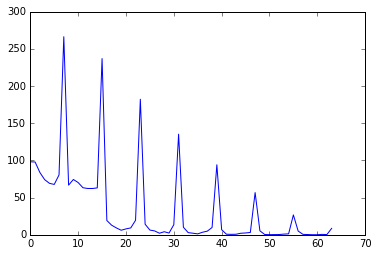

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Number of visits per episode:
plt.plot(visits/num_episodes)
num_episodes/visits

### Test Run

In [ ]:
def moving_average(a, n=100) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

env.monitor.start('recordings', force=True)
num_episodes = 20000
R = []

model.r_prob = 0 # ensure that only the optimal solution is used

for n in xrange(num_episodes):
    newstate = env.reset()
    done = False

    while not done:
        # Current state
        oldstate = newstate
        
        # Perform epsilon-greedy action:
        action = model.epsilon_greedy_action(oldstate)

        # Take action and observe state and reward
        newstate, reward, done, info = env.step(action)
        
    R.append(reward)
    
    if n % 1000 == 101:
        MA = np.max(moving_average(R))
        print 'step: ' + str(n) + '\t MRA: ' + str(MA)
        if MA > 0.99:
            break
env.monitor.close()

In [ ]:
print len(R)
print np.min([n,100])
print moving_average(R, n = np.min([n,100]))


In [5]:
def moving_average(a, n=100) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

MA = moving_average(R)

np.max(MA)

0.82999999999999996

In [ ]:
gym.upload('/notebooks/hjem/RL/recordings', api_key='sk_znZbtlUTlu1nJNqFLRIyA')